In [1]:
import rasterio
import os
import sys

import matplotlib.pyplot as plt

sys.path.append("../starfm")
from starfm import starfm


In [2]:
with rasterio.open(os.path.join(os.getcwd(), "starfm_tests", "road_veg", "sim_Landsat_t1.bin")) as src:
    fine_t0 = src.read(1)
    meta = src.meta

with rasterio.open(os.path.join(os.getcwd(), "starfm_tests", "road_veg", "sim_MODIS_t1.bin")) as src:
    coarse_t0 = src.read(1)

with rasterio.open(os.path.join(os.getcwd(), "starfm_tests", "road_veg", "sim_MODIS_t4.bin")) as src:
    coarse_t1 = src.read(1)

/Users/00094708/anaconda3/envs/starfm/lib/python3.10/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


In [3]:
window_size = 51
window_size_half = window_size // 2
mask_val = -9999
spatial_impact_factor = window_size
dim_rows = 150
dim_cols = 150
tmp_diff_flag = False
spectral_uncertainty = 50
temporal_uncertainty = 50
n_classes=40

In [4]:
preds = starfm(
    fine_t0,
    coarse_t0,
    coarse_t1,
    window_size,
    window_size_half,
    mask_val,
    dim_rows,
    dim_cols,
    tmp_diff_flag,
    spectral_uncertainty,
    temporal_uncertainty,
    spatial_impact_factor,
    n_classes
)


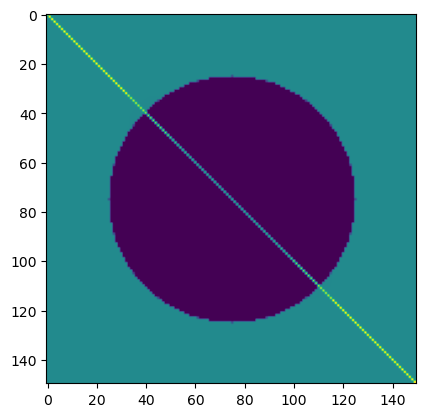

In [5]:
plt.imshow(preds)

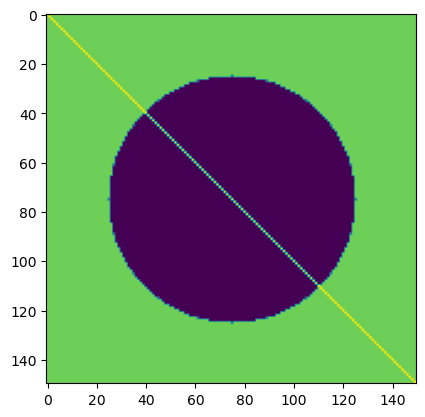

In [6]:
with rasterio.open(os.path.join(os.getcwd(), "starfm_tests", "road_veg", "sim_Landsat_t4.bin")) as src:
    fine_t4 = src.read(1)
plt.imshow(fine_t4)